# My Battle of Neighborhoods work

### Introduction/Business problem section

In this work i will try to compare hotels in two multicultural cities, American New York and Canadian Toronto, that can be similar in many aspects and different in many more. I am going to be as creative as I want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of my choice or to come up with a problem that I can use the Foursquare location data to solve.


### Data description

I will need to use the Foursquare location data to solve the problem or execute my idea. I can absolutely use other datasets in combination with the Foursquare location data, for example Wikipedia pages or other sources of information available publicly, like csv files at governmental online pages.  

### So let's use some foursquare to get the data to mess with

In [1]:
import numpy as np 

import pandas as pd 

import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [5]:
CLIENT_ID = '45MWALKON1JTXEMRF3WFCNUAO1ZKVUD2I5FFXH23QGPB11UZ' 
CLIENT_SECRET = 'GL04ECMB2KJ5SVKB2CZ0Q1U0YGDRX5SXGOB1QA0NOCZ5W3RL' 
VERSION = '20180604'
LIMIT = 30
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 45MWALKON1JTXEMRF3WFCNUAO1ZKVUD2I5FFXH23QGPB11UZ
CLIENT_SECRET:GL04ECMB2KJ5SVKB2CZ0Q1U0YGDRX5SXGOB1QA0NOCZ5W3RL


So let's assume i'm staying in Toronto Hilton, 145 Richmond St

In [6]:
address = '145 Richmond St W, Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
Tlatitude = location.latitude
Tlongitude = location.longitude
print(Tlatitude, Tlongitude)

43.64993865 -79.3853803728614


And now let's assume i'm in Conrad, NY, from the lab

In [7]:
address = '102 North End Ave, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
Nlatitude = location.latitude
Nlongitude = location.longitude
print(Nlatitude, Nlongitude)

40.7149555 -74.0153365


Let us compare those two hotels

In [8]:
Conrad = np.array([Nlatitude, Nlongitude])
Hilton = np.array([Tlatitude, Tlongitude])
print(Conrad, Hilton)

[ 40.7149555 -74.0153365] [ 43.64993865 -79.38538037]


In [9]:
Conrad == Hilton

array([False, False])

As we can see, the data analysis shows us that the two hotels are completely different places


Let's create a data frame to fool around

In [11]:
Hotels_df = pd.DataFrame({'Hotels': ['Conrad', 'Hilton'], 'Lat': [ 40.7149555, 43.64993865], 'Lon': [ -74.0153365, -79.38538037]})
Hotels_df

,Hotels,Lat,Lon
0,Conrad,40.714956,-74.015337
1,Hilton,43.649939,-79.385380


let's make a function

In [12]:
def BetterHotel(x, y):
    if x[1] > y[1]:
        return Hotels_df['Hotels'][Hotels_df['Lon'] == x[1]]+" is damn better, because it's warmer"
    else:
        return Hotels_df['Hotels'][Hotels_df['Lon'] == y[1]]+" is damn better, because it's warmer"

and use it!

In [13]:
BetterHotel(Conrad, Hilton)

0    Conrad is damn better, because it's warmer
Name: Hotels, dtype: object

Let us vizualise it, to make sure

<function matplotlib.pyplot.show(*args, **kw)>

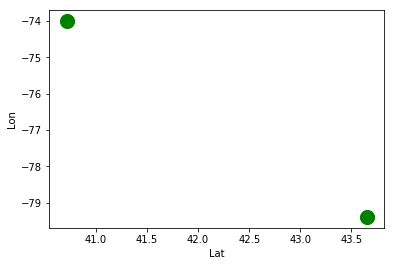

In [15]:
import matplotlib.pyplot as plt
Hotels_df.plot(kind = 'scatter', x = 'Lat', y = 'Lon', s = 200, c = 'g')
plt.show

So if you don't want your ass frozen, you go to Conrad

### Now, let's assume that it is lunch time, and i'm craving Chinese food, staying at Conrad.

In [16]:
search_query = 'Chinese'
radius = 500
print(search_query + ' .... OK!')

Chinese .... OK!


#### Define the corresponding URL for Conrad hotel

In [18]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Nlatitude, Nlongitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=45MWALKON1JTXEMRF3WFCNUAO1ZKVUD2I5FFXH23QGPB11UZ&client_secret=GL04ECMB2KJ5SVKB2CZ0Q1U0YGDRX5SXGOB1QA0NOCZ5W3RL&ll=40.7149555,-74.0153365&v=20180604&query=Chinese&radius=500&limit=30'

In [22]:
N_results = requests.get(url).json()
N_results

{'meta': {'code': 200, 'requestId': '5d6ed8b5cc7d410037a65b0c'},
 'response': {'venues': [{'id': '51c87762498e29ad0293dab1',
    'name': 'Chinese Mirch (WTC Truck)',
    'location': {'lat': 40.713732,
     'lng': -74.016616,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.713732,
       'lng': -74.016616}],
     'distance': 173,
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['New York, NY', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1cb941735',
      'name': 'Food Truck',
      'pluralName': 'Food Trucks',
      'shortName': 'Food Truck',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1567545525',
    'hasPerk': False}]}}

The result shows us that here is where a Chinese food fan will have to eat near Conrad hotel

In [28]:
WhereToEat = N_results['response']['venues']
ChineseFood = pd.DataFrame(WhereToEat)
ChineseFood[['name', 'location']]

,name,location
0,Chinese Mirch (WTC Truck),"{'lat': 40.713732, 'lng': -74.016616, 'labeled..."


So a Chinese food fan will have to stick to this:
![](http://4.bp.blogspot.com/-Z7nfZpekEoE/UKlHHJ84HXI/AAAAAAAAV-0/AZRuxZBCOxc/s1600/IMG_1046.JPG)

### Now, let's assume that i'm craving Chinese food near Toronto Hilton.

In [29]:
Turl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Tlatitude, Tlongitude, VERSION, search_query, radius, LIMIT)
Turl

'https://api.foursquare.com/v2/venues/search?client_id=45MWALKON1JTXEMRF3WFCNUAO1ZKVUD2I5FFXH23QGPB11UZ&client_secret=GL04ECMB2KJ5SVKB2CZ0Q1U0YGDRX5SXGOB1QA0NOCZ5W3RL&ll=43.64993865,-79.3853803728614&v=20180604&query=Chinese&radius=500&limit=30'

In [30]:
T_results = requests.get(Turl).json()
T_results

{'meta': {'code': 200, 'requestId': '5d6eda6086bc490033a8c369'},
 'response': {'venues': [{'id': '5202d246498e9649c88150b7',
    'name': 'Toronto Chinese Academy',
    'location': {'address': '133 Richmond Street West',
     'crossStreet': 'York Street',
     'lat': 43.65014006138457,
     'lng': -79.38485690552969,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65014006138457,
       'lng': -79.38485690552969}],
     'distance': 47,
     'postalCode': 'M5H 2L3',
     'cc': 'CA',
     'neighborhood': 'Financial District',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['133 Richmond Street West (York Street)',
      'Toronto ON M5H 2L3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1ae941735',
      'name': 'University',
      'pluralName': 'Universities',
      'shortName': 'University',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/default_',
       'suffix': '.png'},
      'pri

In [32]:
WhereToEatInToro = T_results['response']['venues']
ChineseFoodInToro = pd.DataFrame(WhereToEatInToro)
ChineseFoodInToro[['name', 'location']]

,name,location
0,Toronto Chinese Academy,"{'address': '133 Richmond Street West', 'cross..."
1,Hong Shing Chinese Restaurant,"{'address': '195 Dundas St W', 'crossStreet': ..."
2,Chinese Visa Application Service Center,"{'address': '393 University Ave, Suite 1501', ..."
3,Yueh Tung Chinese Restaurant,"{'address': '126 Elizabeth St.', 'crossStreet'..."
4,Tasty Chinese Food,"{'address': 'Village by the Grange', 'lat': 43..."
5,Chic Chinoise Pan Asian Cuisine,"{'address': '214 King St. W', 'crossStreet': '..."


#### Holy ...! Four places to taste Chinese food! That was unexpected

And that may be telling something about what city of the two is more multicultural, though that's not the subject of this research. But if you wanna eat something Chinese throughout your stay in the hotel - you should definitely choose Toronto Hilton. 